<a href="https://www.kaggle.com/code/mindoflogicalfire/machinefailure?scriptVersionId=142342997" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e17/sample_submission.csv
/kaggle/input/playground-series-s3e17/train.csv
/kaggle/input/playground-series-s3e17/test.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
df= pd.read_csv("/kaggle/input/playground-series-s3e17/train.csv")
df_test= pd.read_csv("/kaggle/input/playground-series-s3e17/test.csv")

In [4]:
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


<Axes: xlabel='Type', ylabel='count'>

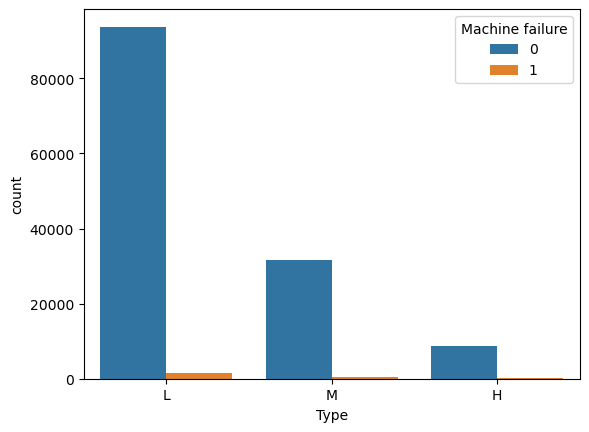

In [5]:
sns.countplot(x=df.Type,hue=df['Machine failure'])

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
oe=LabelEncoder()

In [8]:
oe.fit(['L','M','H'])
df.Type=oe.transform(df.Type)

In [9]:
df.corr()

/tmp/ipykernel_20/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
id,1.000000,0.000975,-0.005338,-0.002396,0.004419,-0.001968,-0.001790,0.001500,-0.000475,-0.000680,0.003275,0.002114,0.000175
Type,0.000975,1.000000,0.013330,0.003752,-0.002327,0.002160,0.004057,-0.005049,0.000322,0.004929,0.003541,-0.014087,0.002238
Air temperature [K],-0.005338,0.013330,1.000000,0.856080,0.016545,-0.006773,0.016994,0.067744,0.003826,0.100454,0.007967,0.007842,0.004815
Process temperature [K],-0.002396,0.003752,0.856080,1.000000,0.011263,-0.006298,0.012777,0.030966,0.004459,0.041454,0.003871,0.005337,0.004399
Rotational speed [rpm],0.004419,-0.002327,0.016545,0.011263,1.000000,-0.779394,0.003983,-0.060868,-0.005765,-0.081996,0.053948,-0.061376,-0.003410
Torque [Nm],-0.001968,0.002160,-0.006773,-0.006298,-0.779394,1.000000,-0.003148,0.145793,0.012983,0.100773,0.050289,0.108765,0.007986
Tool wear [min],-0.001790,0.004057,0.016994,0.012777,0.003983,-0.003148,1.000000,0.056448,0.046470,0.011709,0.007624,0.063604,-0.002071
Machine failure,0.001500,-0.005049,0.067744,0.030966,-0.060868,0.145793,0.056448,1.000000,0.311919,0.564507,0.383941,0.494668,0.001428
TWF,-0.000475,0.000322,0.003826,0.004459,-0.005765,0.012983,0.046470,0.311919,1.000000,0.010145,0.039927,0.036041,0.002044
HDF,-0.000680,0.004929,0.100454,0.041454,-0.081996,0.100773,0.011709,0.564507,0.010145,1.000000,0.046680,0.067149,0.000885


/tmp/ipykernel_20/881351215.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

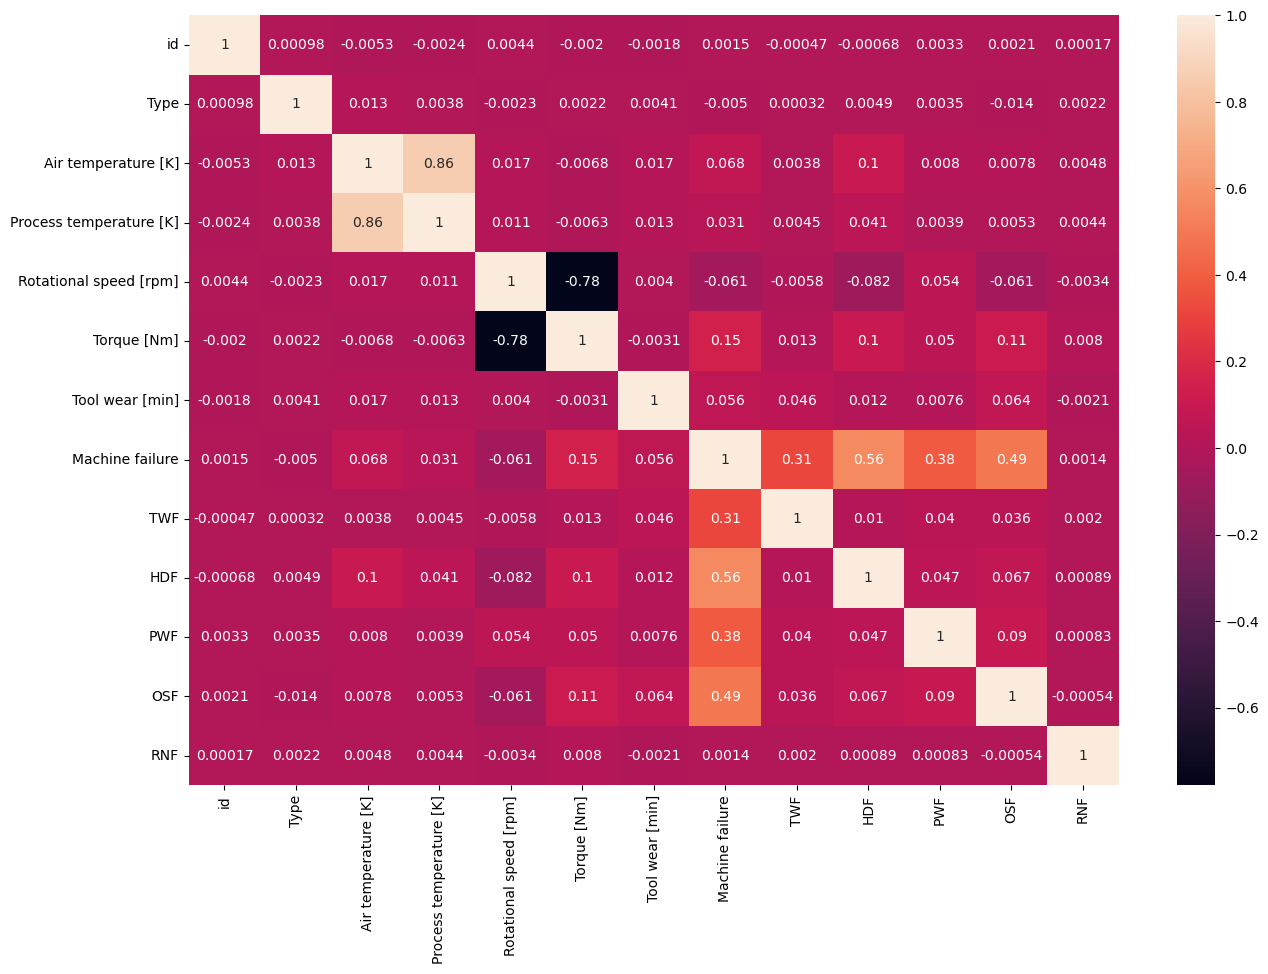

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

* we can observe that OSF,PWF,HDF,TWF,Torque,Rotational Speed is highly correlated
* we can also see that torque and rotational speed is highly related so we can drop any one 


## Feature Selection


In [11]:
df.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [12]:
x=df[['TWF', 'HDF', 'PWF', 'OSF','Torque [Nm]','Process temperature [K]','Type']]
y=df['Machine failure']

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc=StandardScaler()

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=12,test_size=.2)

In [16]:
x_train=sc.fit_transform(x_train)

In [17]:
x_test=sc.transform(x_test)

In [18]:
# plt.figure(figsize=(15,10))

# sns.boxplot(x_train)As we can see there  is so many outlier we will remove it

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  int64  
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [20]:
df.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [21]:
df.drop_duplicates(inplace=True,keep='first')
df.shape

(136429, 14)

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
x=pd.DataFrame(x)
x

,TWF,HDF,PWF,OSF,Torque [Nm],Process temperature [K],Type
0,0,0,0,0,36.1,309.6,1
1,0,0,0,0,29.1,312.1,2
2,0,0,0,0,26.5,308.5,1
3,0,0,0,0,44.3,310.9,1
4,0,0,0,0,35.4,309.0,2
...,...,...,...,...,...,...,...
136424,0,0,0,0,37.5,311.4,2
136425,0,0,0,0,49.1,308.5,0
136426,0,0,0,0,38.5,311.8,1
136427,0,0,0,0,46.3,310.9,1


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
m1={
    'Random Forest':RandomForestClassifier(),
    'logistic':LogisticRegression(),
    'Decision Tree':DecisionTreeClassifier()
}
from sklearn.metrics import accuracy_score

In [25]:
def eval_model(x_train,y_train,x_test,y_test,models):
    report={}
    for i in range(len(models)):
        model=list(models.values())[i]
        model.fit(x_train,y_train)

        y_model_pred=model.predict(x_test)
        
        model_score=accuracy_score(y_test,y_model_pred)
        report[list(models.keys())[i]]=model_score
        # report.update({list(models.keys())[i]:model_score})

    return report
    

    

In [26]:
eval_model(x_train,y_train,x_test,y_test,m1)

{'Random Forest': 0.9947225683500697,
 'logistic': 0.9952723008136041,
 'Decision Tree': 0.9940995382247306}

In [27]:
df_test.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [28]:
test=df_test.copy()
test.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [29]:
test=test[['TWF', 'HDF', 'PWF', 'OSF','Torque [Nm]','Process temperature [K]','Type']]
test.Type=oe.transform(test.Type)
test=sc.transform(test)

In [30]:
param={
    'penalty':['l1','l2','elasticnet',None],
    'C':[10,1,3,2,50]
}

In [31]:
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(LogisticRegression(),param_grid=param,scoring='accuracy',cv=5,verbose=3)

In [32]:
import warnings
warnings.simplefilter('ignore')

In [33]:
cv.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ....................C=10, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ....................C=10, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ....................C=10, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ....................C=10, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ....................C=10, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END ..................C=10, penalty=l2;, score=0.997 total time=   0.2s
[CV 2/5] END ..................C=10, penalty=l2;, score=0.996 total time=   0.2s
[CV 3/5] END ..................C=10, penalty=l2;, score=0.996 total time=   0.2s
[CV 4/5] END ..................C=10, penalty=l2;, score=0.996 total time=   0.2s
[CV 5/5] END ..................C=10, penalty=l2;, score=0.996 total time=   0.3s
[CV 1/5] END ............C=10, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5] END ............C=10, penalty=elasticn

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [10, 1, 3, 2, 50],
                         'penalty': ['l1', 'l2', 'elasticnet', None]},
             scoring='accuracy', verbose=3)

In [34]:
cv.best_params_

{'C': 10, 'penalty': 'l2'}

In [35]:
Machine_Faliure=cv.predict(test)

In [36]:
Machine_Faliure

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
subb=df_test['id']

subb=pd.DataFrame(subb).join(pd.DataFrame(Machine_Faliure))


In [38]:
subb=subb.rename(columns={'id':'id',0:'Machine failure'})
subb

,id,Machine failure
0,136429,0
1,136430,0
2,136431,0
3,136432,0
4,136433,0
...,...,...
90949,227378,0
90950,227379,0
90951,227380,0
90952,227381,0


In [39]:
subb.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [40]:
pd.read_csv('submission.csv')

,id,Machine failure
0,136429,0
1,136430,0
2,136431,0
3,136432,0
4,136433,0
...,...,...
90949,227378,0
90950,227379,0
90951,227380,0
90952,227381,0
